# ディープラーニングで手書き数字の判定をしよう！

参考書籍: [すぐに使える! 業務で実践できる! PythonによるAI・機械学習・深層学習アプリのつくり方](http://www.socym.co.jp/book/1164) 

著:クジラ飛行机

[ソースコード(github)](https://github.com/kujirahand/book-mlearn-gyomu/tree/master/src/ch5/digits)
著者が本に書いたソースコードがgithubにあがっています。そのリンクです。

## Step1.MNISTのデータを利用する

MNISTとは

https://udemy.benesse.co.jp/ai/mnist.html

MNISTで提供される画像のデータ構造: 28x28ピクセル、グレースケール(0-255)

In [10]:
import tensorflow as tf
import keras

(60000, 28, 28)


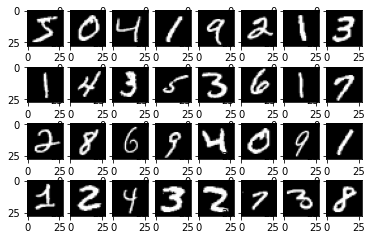

In [11]:
from keras.datasets import mnist
from matplotlib import pyplot

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 次元を確認  output: >(60000,28,28)
print(X_train.shape)

# データを4x8に出力
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')

# 画像を表示
pyplot.show()

## Step2. データを整形

In [12]:
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# ラベルデータをone-hotベクトルに直す (ある一つの要素だけが1で、それ以外は0のベクトルのこと)
y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Step3. 単純なNNでの学習と評価

In [14]:

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
model.fit(X_train, y_train,
    batch_size=20, epochs=20)

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

Epoch 1/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3156 - accuracy: 0.9064
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0807 - accuracy: 0.9750
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0486 - accuracy: 0.9844
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0336 - accuracy: 0.9889
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0263 - accuracy: 0.9911
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 7/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 8/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0141 - accuracy: 0.9949
Epoch 9/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 10/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.010

## Step4. MLPで分類して評価する

In [25]:
# MLPでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# MNISTのデータを読み込み --- (*1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

# MLPモデル構造を定義 --- (*2)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
print(hist.history)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4303 - accuracy: 0.8663 - val_loss: 0.1096 - val_accuracy: 0.9659
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1063 - accuracy: 0.9669 - val_loss: 0.0906 - val_accuracy: 0.9720
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0742 - val_accuracy: 0.9793
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0814 - val_accuracy: 0.9786
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0869 - val_accuracy: 0.9802
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0358 - accuracy: 0.9896 - val_loss: 0.0820 - val_accuracy: 0.9814
Epoch 

KeyError: ignored

上の結果のLossを見るとエポックの数ごとに値（緑の線）が増えてしまっている。
学習を進めているのにモデルの訓練データだけ損失が減っていき、テストデータでは損失が増えていくのは
分類問題に対する間違った本質を学習している可能性がある → 過学習

---

### 参考:loss と accuracyの見方や過学習について


https://qiita.com/hiroyuki827/items/213146d551a6e2227810

## Step5. CNNで分類して評価する

Epoch 1/12
469/469 [==============================] - 4s 6ms/step - loss: 0.4502 - accuracy: 0.8576 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0818 - accuracy: 0.9772 - val_loss: 0.0414 - val_accuracy: 0.9857
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0328 - val_accuracy: 0.9895
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0334 - val_accuracy: 0.9899
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0317 - val_accuracy: 0.9916
Epoch 

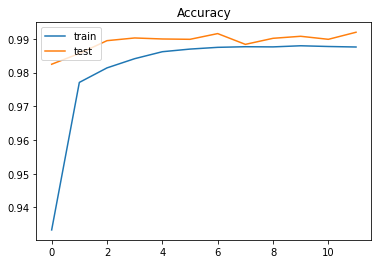

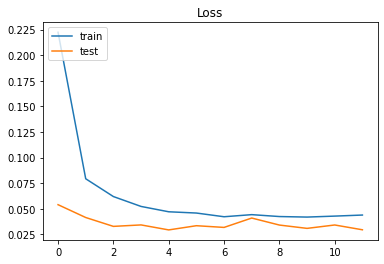

In [26]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_shape = (28, 28, 1)
out_size = 10


# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを(1, 28, 28)の三次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義 --- (*2)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model_cnn.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model_cnn.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pwd
# 現在のディレクトリにモデルを画像化したものを保存
keras.utils.plot_model(model_cnn, to_file='model.png', show_shapes=True)

/content


## Step6. 手書きの文字を認識する

In [17]:

# Google driveをマウントする （既にマウントしていたら飛ばしてOK）
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# ドライブの中にディレクトリを移動する
%cd /content/drive/My Drive

#作業用ディレクトリを作成する
!mkdir redimpulz_spring_study

# 作業用ディレクトリの中に移動する
%cd /content/drive/My Drive/redimpulz_spring_study

# 手書きの画像置き場のディレクトリを作成する
!mkdir freehand_number

# 画像置き場ディレクトリの中に移動する
%cd /content/drive/My Drive/redimpulz_spring_study/freehand_number

/content/drive/My Drive
/content/drive/My Drive/redimpulz_spring_study
/content/drive/My Drive/redimpulz_spring_study/freehand_number


### 画像のアップロード

> ** /content/drive/My Drive/redimpulz_spring_study/freehand_number 配下にGoogle Driveから
白地に黒の適当な手書き数字画像をアップロードする。 **

※ 1から9の数字でないと正しく認識できません。



---



### 手書き画像を作成したいときに使えそうなサービスとアプリ

* [AutoDraw (Web)](https://www.autodraw.com/)

* [FireAlpaca(Win/Mac対応ペイントソフト)](https://firealpaca.com/ja/)

AutoDrawでは、太字で黒の数字を書いて、左上のメニューバーからDownloadで画像がダウンロードできます。

ダウンロードできる拡張子はpngなのでjpgに変えます。


---

### 手書き画像を読み込んで、CNNモデルで判定



読み込んだ元画像


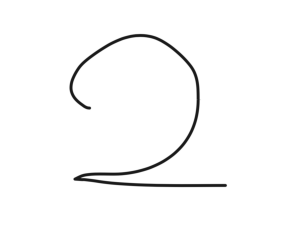

実際にモデルに流し込む画像


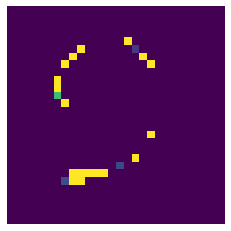

この画像の数字は1です 

読み込んだ元画像


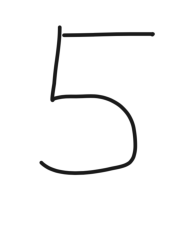

実際にモデルに流し込む画像


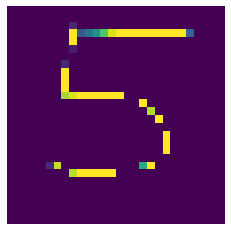

この画像の数字は5です 



In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_number(filename):
  # 読み込み
  img = cv2.imread(filename)
  # 読み込んだ画像を表示する
  print("読み込んだ元画像")
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # 読み込み画像をリサイズ
  img = cv2.resize(img,(28,28))
 
  # ネガポジ反転
  img = 255 - img
  
  # モデルに流し込む画像を表示する
  print("実際にモデルに流し込む画像")
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  
  # 以前のCNNモデルに対応するようにデータを(1, 28, 28)の三次元配列に変換
  img = img.reshape(1, 28, 28, 1).astype('float32') / 255
  # 予測 (以前学習したCNNのモデルを使ってるので注意)
  ret = model_cnn.predict(img)
  return ret


# 画像ファイルを指定
ans = predict_number("2.png")
print("この画像の数字は" +  str(np.argmax(ans)) + "です \n")

ans = predict_number("5.png")
print("この画像の数字は" +  str(np.argmax(ans)) + "です \n")

#ans = predict_number("test3.jpg")
#print("この画像の数字は" +  str(np.argmax(ans)) + "です \n")
